In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('database', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True) #makedirs crea directorios si llega a faltar alguno en la ruta que especificamos.
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [ ]:
fetcg_hoyr(paginaweb, rellenas)

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
#Data
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
import matplotlib.pyplot as plt

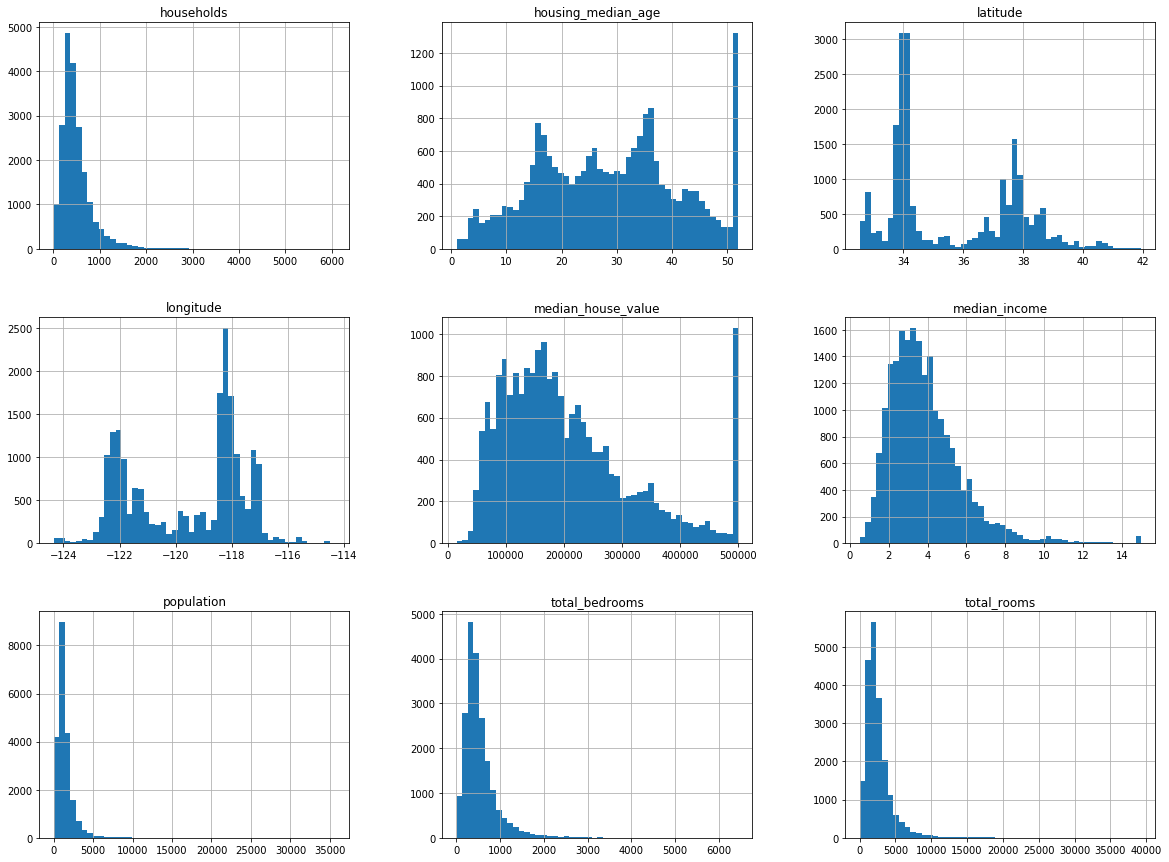

In [15]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

### Create Test-Set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(housing, test_size = 0.2, random_state = 42)

NameError: name 'housing' is not defined

---
### Stratified sampling to avoid bias

In [8]:
import numpy as np

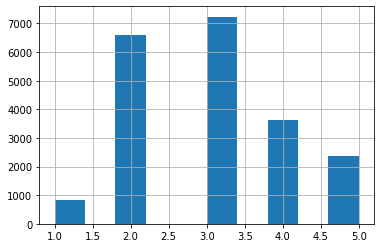

In [9]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0,1.5,3.0,4.5,6, np.inf],
                              labels = [1,2,3,4,5]) #explicacion ampliada pag 54

housing['income_cat'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [16]:
strat_test['income_cat'].value_counts() / len(strat_test) * 100 

3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: income_cat, dtype: float64

In [21]:
test['income_cat'].value_counts() / len(test) * 100

3    35.852713
2    32.437016
4    16.739341
5    10.949612
1     4.021318
Name: income_cat, dtype: float64

In [11]:
for set_ in (strat_train, strat_test):
    set_.drop('income_cat', axis = 1, inplace = True)

# Exploring and visualize data for Insights

In [16]:
copy_train = strat_train.copy()
copy_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


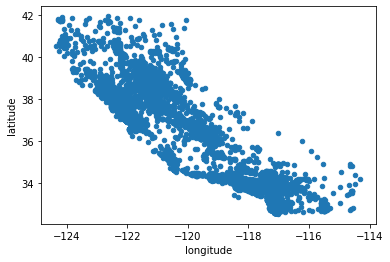

In [19]:
copy_train.plot(kind ='scatter', x = 'longitude', y = 'latitude')

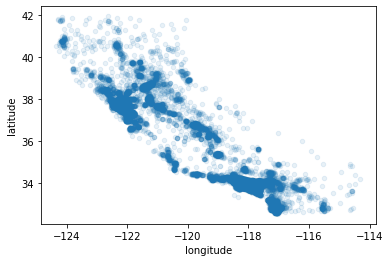

In [20]:
#vamos a mejorar esto para ver con mas claridad
copy_train.plot(kind ='scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

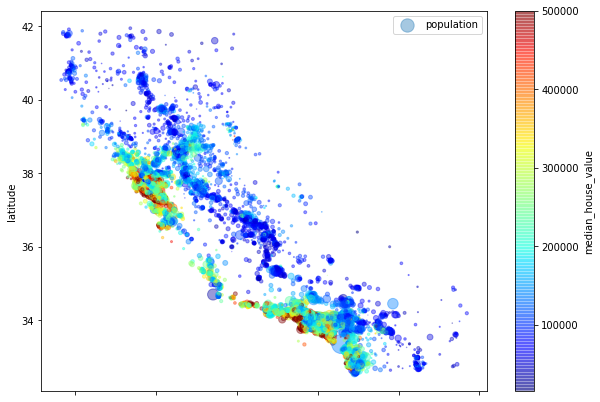

In [22]:
copy_train.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
               s = copy_train['population']/100, label = 'population',
               c = 'median_house_value', cmap = plt.get_cmap('jet'),
               colorbar = True, figsize = (10,7))
plt.legend()

In [17]:
corr_matrix = copy_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [26]:
corr_matrix.median_house_value.sort_values(ascending = False) #lo de sort values esta de detalle nada mas, para que salgan arriba las que mas correlacionan. ta bueno

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C17074988>,
      dtype=object)

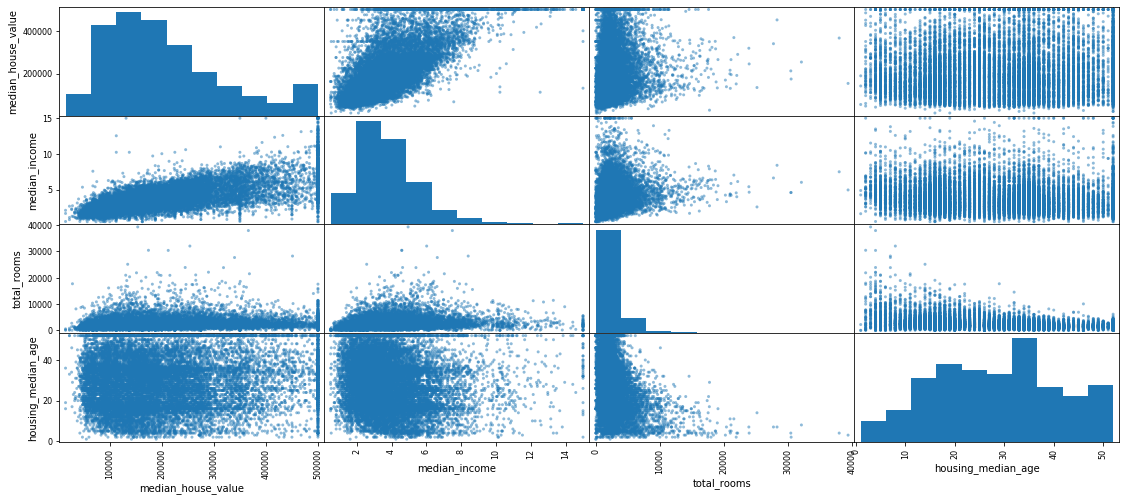

In [16]:
selec = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(copy_train[selec], figsize = (19,8))

### Experiment with atributes combinations

In [12]:
copy_train['rooms_per_households'] = copy_train['total_rooms']/copy_train['households']
copy_train['bedrooms_per_rooms'] = copy_train['total_bedrooms']/copy_train['total_rooms']
copy_train['population_per_households'] = copy_train['population']/copy_train['households']

NameError: name 'copy_train' is not defined

In [ ]:
corr_matrix = copy_train.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

---

### Prepare the data for ML algorithms

In [13]:
housing = strat_train.drop('median_house_value', axis = 1) #ya que no queremos aplicar las mismas transformaciones a la variable y
housing_labels = strat_train['median_house_value'].copy()

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [25]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [20]:
median = housing['total_bedrooms'].mean()
housing['total_bedrooms'].fillna(median, inplace = True)

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

#quitamos los atributos no numericos (ocean_proximity) ya que no les podemos hacer la media
housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  436.    , 1164.    ,
        408.    ,    3.5409])

In [21]:
X = imputer.transform(housing_num)

In [22]:
#lo volvemos dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [36]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


Ya no tenemos mas missing values

### Handllig categorical atributes

In [16]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoder = encoder.fit_transform(housing_cat)
housing_cat_encoder

array([0, 0, 4, ..., 1, 0, 3])

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoder.reshape(-1,1))
housing_cat_1hot

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
cat_encoder.categories_

[array([0., 1., 2., 3., 4.])]

In [41]:
housing['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [55]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

---

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #Feature Scaling pagina 69
from sklearn.compose import ColumnTransformer

In [19]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                         ('std_scaler', StandardScaler())])

In [20]:
num_atribs = list(housing_num)
cat_atribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_atribs),
                                   ('cat', OneHotEncoder(), cat_atribs)])

housing_prepared = full_pipeline.fit_transform(housing)

In [21]:
columns = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income','<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND']

housing_prepared_df = pd.DataFrame(housing_prepared, columns = columns, index = housing.index) #en la pag 68 hay una forma de no perder los indices y la cabecera

In [22]:
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.0,0.0,0.0,0.0,1.0
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.0,1.0,0.0,0.0,0.0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0


---
## Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
forest_reg = RandomForestRegressor(n_estimators = 100)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
from sklearn.model_selection import cross_val_score

In [46]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [47]:
forest_rmse_scores = np.sqrt(-scores)

In [48]:
forest_rmse_scores.mean()

49611.66957704296

In [50]:
len(forest_rmse_scores)

10

In [51]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standar desviation: ', scores.std())
    
display_scores(forest_rmse_scores)

Scores:  [48031.50325405 45962.64227375 49129.87172223 49900.10936604
 49388.45708903 53238.49304078 49211.18318688 50263.50779431
 51523.2794623  49467.64858107]
Mean:  49611.66957704296
Standar desviation:  1832.8011789640304


---
#### Grid search

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = [{'n_estimators': [150,200,250], 'max_features': [8]},
              {'n_estimators': [3, 10], 'max_features': [2,3,4], 'bootstrap': [False]}]

forest_reg_to_grid = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg_to_grid, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 1

In [32]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 150}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
grid_search.cv_results_

{'mean_fit_time': array([0.05143027, 0.1598228 , 0.47279339, 0.78259487, 0.94815574,
        0.07411203, 0.2423492 , 0.70403733, 1.20803633, 1.4380897 ,
        0.09732027, 0.32418709, 0.98355966, 1.61182399, 1.95394168,
        0.12172332, 0.40454607, 1.21212754, 2.02539167, 2.43288355,
        0.15059395, 0.48975959, 1.46705856, 2.43913569, 2.96212168,
        0.07820392, 0.25365257, 0.09624133, 0.31218829, 0.11349206,
        0.38143201]),
 'std_fit_time': array([0.00243705, 0.00126973, 0.0054721 , 0.00611547, 0.00644649,
        0.00194223, 0.00432663, 0.00162961, 0.01967653, 0.0132729 ,
        0.00151564, 0.00373508, 0.00405101, 0.00638092, 0.02048621,
        0.00107085, 0.00194782, 0.00512421, 0.00692574, 0.01739324,
        0.00440651, 0.00346917, 0.01213819, 0.00478001, 0.06733249,
        0.00138599, 0.00441118, 0.00285607, 0.00347645, 0.0019726 ,
        0.00433073]),
 'mean_score_time': array([0.00247087, 0.00744028, 0.02091904, 0.0348187 , 0.04087543,
        0.00257702, 

In [31]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_scores), params)

63845.887542487944 {'max_features': 2, 'n_estimators': 3}
55603.800651734244 {'max_features': 2, 'n_estimators': 10}
52937.66585511395 {'max_features': 2, 'n_estimators': 30}
52292.876627555925 {'max_features': 2, 'n_estimators': 50}
52082.72738990137 {'max_features': 2, 'n_estimators': 60}
52045.4312488218 {'max_features': 2, 'n_estimators': 100}
51777.08415636816 {'max_features': 2, 'n_estimators': 150}
60829.07163454005 {'max_features': 4, 'n_estimators': 3}
53036.32168231449 {'max_features': 4, 'n_estimators': 10}
50636.580648446914 {'max_features': 4, 'n_estimators': 30}
50531.72798158946 {'max_features': 4, 'n_estimators': 50}
50290.519881396205 {'max_features': 4, 'n_estimators': 60}
50148.33599594622 {'max_features': 4, 'n_estimators': 100}
49987.31633038281 {'max_features': 4, 'n_estimators': 150}
59773.379618536834 {'max_features': 6, 'n_estimators': 3}
52795.00390975941 {'max_features': 6, 'n_estimators': 10}
50484.043282943 {'max_features': 6, 'n_estimators': 30}
49971.6232

In [35]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.12272647e-01, 1.03546762e-01, 5.08502472e-02, 2.97812705e-02,
       2.65429562e-02, 3.73645636e-02, 2.53435242e-02, 4.40147650e-01,
       9.73052913e-03, 1.55942513e-01, 4.33500919e-05, 2.24491494e-03,
       6.18907206e-03])

In [40]:
attributes = housing_prepared_df.columns.tolist()
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'NEAR OCEAN',
 'INLAND',
 'NEAR BAY',
 'ISLAND']

In [43]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.4401476501150414, 'median_income'),
 (0.15594251290120142, 'NEAR OCEAN'),
 (0.11227264728727974, 'longitude'),
 (0.10354676182975, 'latitude'),
 (0.05085024715065858, 'housing_median_age'),
 (0.037364563629992506, 'population'),
 (0.029781270491037924, 'total_rooms'),
 (0.026542956174155016, 'total_bedrooms'),
 (0.025343524201695278, 'households'),
 (0.009730529128983851, '<1H OCEAN'),
 (0.006189072055949292, 'ISLAND'),
 (0.002244914942383185, 'NEAR BAY'),
 (4.335009187173145e-05, 'INLAND')]

In [45]:
final_model = grid_search.best_estimator_

x_test = strat_test.drop('median_house_value', axis = 1)
y_test = strat_test['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)

prediction = final_model.predict(x_test_prepared)

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
mse = np.sqrt(mse)
mse

46695.60183105269